In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler


# Import Data

In [5]:
#Import dataset
features=pd.read_csv("sales_features.csv",index_col=0)
pred=pd.read_csv("sales_pred.csv",index_col=0)
stores=pd.read_csv("sales_stores.csv",index_col=0)

In [6]:
# Studying Feature Dataset and renaming columns to match other dataset columns
features=features.rename(columns={'Store':'store','Date':'date','Temperature':'Temperature'})
print('Feature dataset Datatype:\n', features.shape)
print('Feature dataset Shape:', features.shape)
print('Null values in features dataset:\n',features.isnull().sum())

Feature dataset Datatype:
 (8190, 3)
Feature dataset Shape: (8190, 3)
Null values in features dataset:
 store          0
date           0
Temperature    0
dtype: int64


In [7]:
#Studying Pred Dataset
print('Pred dataset Datatype:\n', pred.dtypes)
print('Pred dataset Shape:', pred.shape)
print('Null values in pred dataset:',pred.isnull().sum())


Pred dataset Datatype:
 store             int64
departments       int64
date             object
weekly_sales    float64
dtype: object
Pred dataset Shape: (421570, 4)
Null values in pred dataset: store           0
departments     0
date            0
weekly_sales    0
dtype: int64


In [8]:
pred.fillna(0, inplace=True)

In [9]:
#Studying stores Dataset
print('Stores dataset Datatype:\n', pred.dtypes)
print('Stores dataset Shape:\n', pred.shape)
print('Null values in stores dataset:\n',pred.isnull().sum())
print('Unique Values in Column Sale_types: \n',stores.sale_type.unique())

Stores dataset Datatype:
 store             int64
departments       int64
date             object
weekly_sales    float64
dtype: object
Stores dataset Shape:
 (421570, 4)
Null values in stores dataset:
 store           0
departments     0
date            0
weekly_sales    0
dtype: int64
Unique Values in Column Sale_types: 
 ['A' 'B' 'C']


# Merge datasets

In [10]:
data = pd.merge(stores, pred, on='store')
sales = pd.merge(data, features, on=['store','date'])
#sales['sale_type'] = sales['sale_type'].map({'A': 1, 'B': 2,'C':3})
sales.head(5)

,store,sale_type,size,departments,date,weekly_sales,Temperature
0,1,A,151315,12,2010-02-05,39334.454177,64.51
1,1,A,151315,27,2010-02-05,51598.674658,64.51
2,1,A,151315,77,2010-02-05,-1622.215803,64.51
3,1,A,151315,56,2010-02-05,47337.747167,64.51
4,1,A,151315,98,2010-02-05,4549.121928,64.51


# Data Understanding and Cleaning

In [11]:
#Understanding Datasets Datatype
sales.dtypes

store             int64
sale_type        object
size              int64
departments       int64
date             object
weekly_sales    float64
Temperature     float64
dtype: object

In [12]:
# Check for missing values
print("Missing Values:")
print(sales.isnull().sum())

Missing Values:
store           0
sale_type       0
size            0
departments     0
date            0
weekly_sales    0
Temperature     0
dtype: int64


In [13]:
print('Values in column sale_type:',sales.sale_type.unique())

Values in column sale_type: ['A' 'B' 'C']


In [14]:
# Split date in dAy, Month and year column for better data cleaning
sales['Date'] = pd.to_datetime(sales['date'])
sales['day'] = sales['Date'].dt.day
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year
sales['Week'] = sales['Date'].dt.week
sales=sales.drop(['date','Date'],axis=1)
print('Sales:',sales.head(5))

<ipython-input-14-99097e4aaac2>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales['Week'] = sales['Date'].dt.week


Sales:    store sale_type    size  departments  weekly_sales  Temperature  day  \
0      1         A  151315           12  39334.454177        64.51    5   
1      1         A  151315           27  51598.674658        64.51    5   
2      1         A  151315           77  -1622.215803        64.51    5   
3      1         A  151315           56  47337.747167        64.51    5   
4      1         A  151315           98   4549.121928        64.51    5   

   Month  Year  Week  
0      2  2010     5  
1      2  2010     5  
2      2  2010     5  
3      2  2010     5  
4      2  2010     5  


In [15]:
sales.describe()

,store,size,departments,weekly_sales,Temperature,day,Month,Year,Week
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,45.983924,16000.969410,59.602394,15.673131,6.449510,2010.968591,25.826762
std,12.785297,60980.583328,31.753140,17120.540438,18.518466,8.753549,3.243217,0.796876,14.151887
min,1.000000,34875.000000,1.000000,-4988.417984,2.690000,1.000000,1.000000,2010.000000,1.000000
25%,11.000000,93638.000000,16.000000,3515.769559,46.900000,8.000000,4.000000,2010.000000,14.000000
50%,22.000000,140167.000000,44.000000,11596.418962,60.930000,16.000000,6.000000,2011.000000,26.000000
75%,33.000000,202505.000000,75.000000,23693.622839,73.570000,23.000000,9.000000,2012.000000,38.000000
max,45.000000,219622.000000,99.000000,183553.488334,101.950000,31.000000,12.000000,2012.000000,52.000000


We have Negative Values in Weekly sales.

In [16]:
# Weekly sales negative Values
negative_sales_df = sales[sales['weekly_sales'] < 0]
negative_sales_df.describe()

,store,size,departments,weekly_sales,Temperature,day,Month,Year,Week
count,54617.000000,54617.000000,54617.000000,54617.000000,54617.000000,54617.000000,54617.000000,54617.000000,54617.000000
mean,22.197924,136774.791750,43.928667,-2113.424927,59.598569,15.680612,6.455957,2010.968874,25.855778
std,12.791511,60865.070909,31.624692,1322.351374,18.590065,8.762203,3.243094,0.796224,14.161036
min,1.000000,34875.000000,1.000000,-4988.417984,2.690000,1.000000,1.000000,2010.000000,1.000000
25%,11.000000,93638.000000,14.000000,-3174.265103,46.900000,8.000000,4.000000,2010.000000,14.000000
50%,22.000000,140167.000000,40.000000,-2012.886642,60.960000,16.000000,6.000000,2011.000000,26.000000
75%,33.000000,202505.000000,72.000000,-972.729038,73.710000,23.000000,9.000000,2012.000000,38.000000
max,45.000000,219622.000000,99.000000,-0.006672,101.950000,31.000000,12.000000,2012.000000,52.000000


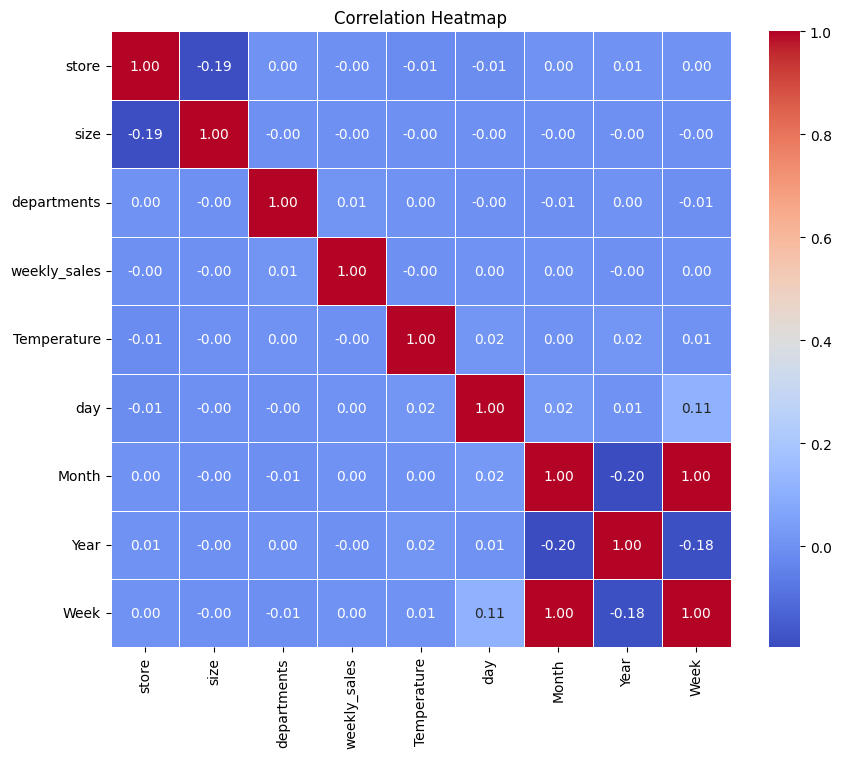

In [17]:
#Calculate the correlation matrix
numeric_columns = negative_sales_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Negative Weekly sales dont show correlation with any other variables

###  Data Visualization

Line Graph

In [18]:
sales.dtypes

store             int64
sale_type        object
size              int64
departments       int64
weekly_sales    float64
Temperature     float64
day               int64
Month             int64
Year              int64
Week              int64
dtype: object

<ipython-input-19-ed7441b55800>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales, x='Month', y='weekly_sales', hue='Year', ci=None)


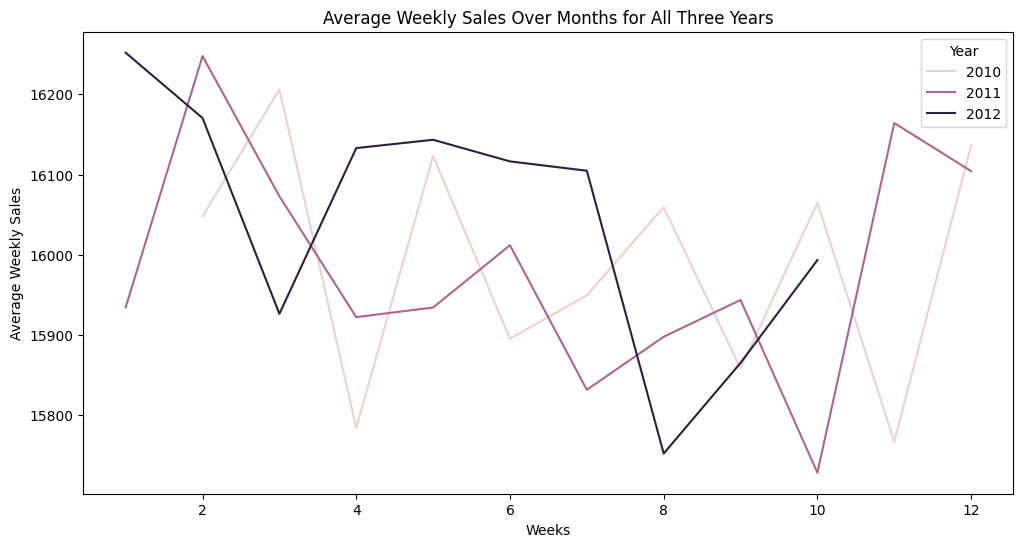

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales, x='Month', y='weekly_sales', hue='Year', ci=None)
#sns.lineplot(data=average_weekly_sales,x='Week', y='weekly_sales',ci=None)
plt.title('Average Weekly Sales Over Months for All Three Years')
plt.xlabel('Weeks')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Year')
plt.show()

<ipython-input-20-3596baf7871d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=sales, x='Year', y='weekly_sales', ci=None)


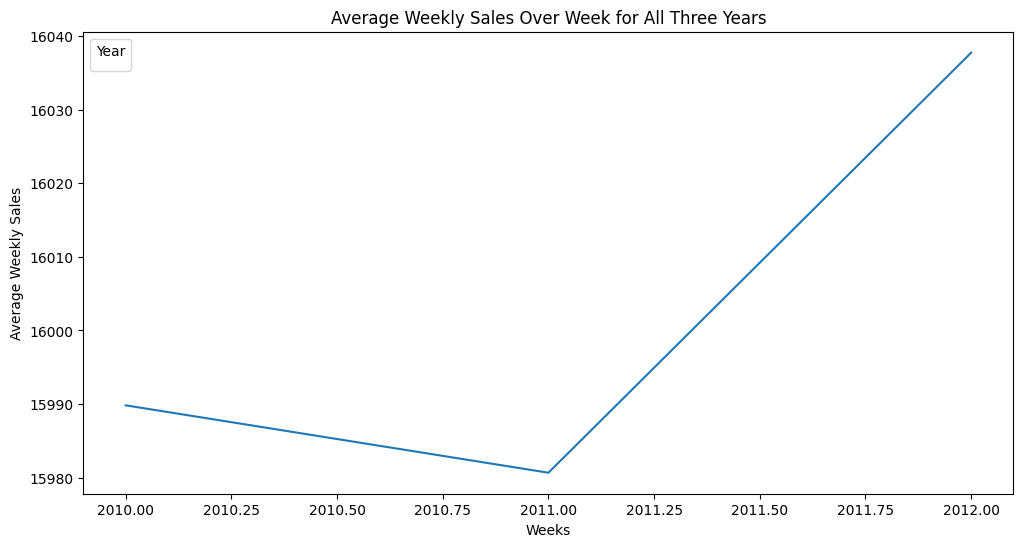

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales, x='Year', y='weekly_sales', ci=None)
#sns.lineplot(data=average_weekly_sales,x='Week', y='weekly_sales',ci=None)
plt.title('Average Weekly Sales Over Week for All Three Years')
plt.xlabel('Weeks')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Year')
plt.show()

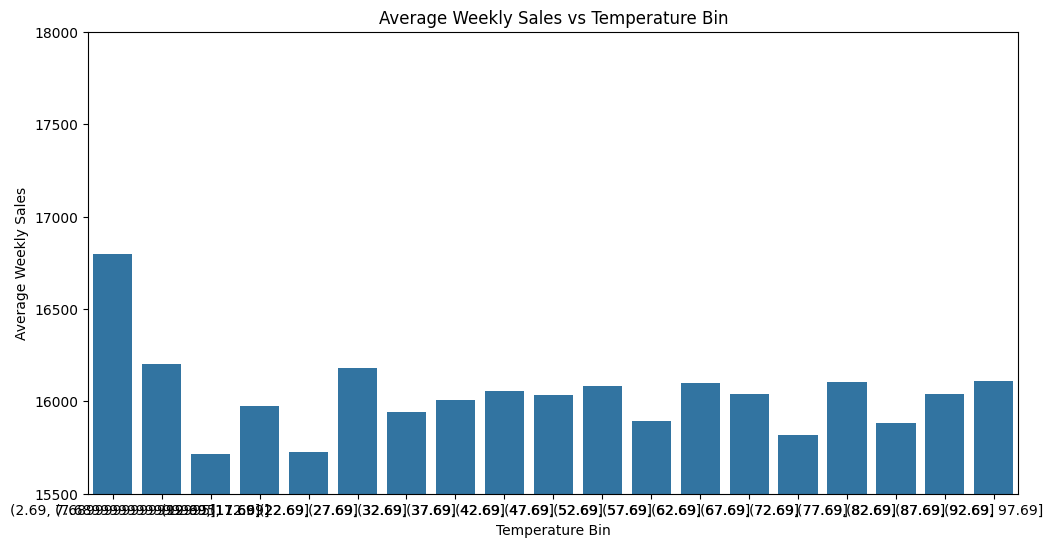

In [21]:
from matplotlib.pyplot import ylim,xlim
# Define temperature bins
temperature_bins = pd.interval_range(start=sales['Temperature'].min(),end=sales['Temperature'].max(),freq=5, closed='right')

temp_sales=sales.copy()
# Group by temperature bin and calculate the average weekly sales
temp_sales['Temperature_bin'] = pd.cut(temp_sales['Temperature'], bins=temperature_bins)
average_weekly_sales_temperature = temp_sales.groupby('Temperature_bin')['weekly_sales'].mean().reset_index()

# Plot the average weekly sales vs Temperature Bin (bar graph)
plt.figure(figsize=(12, 6))
sns.barplot(data=average_weekly_sales_temperature, x='Temperature_bin', y='weekly_sales')
plt.title('Average Weekly Sales vs Temperature Bin')
plt.xlabel('Temperature Bin')
plt.ylabel('Average Weekly Sales')
plt.ylim(15500, 18000)
plt.show()


#### Outliers

In [22]:
# Check for outliers using descriptive statistics
print("\nDescriptive Statistics:")
print(sales.describe())


Descriptive Statistics:
               store           size    departments   weekly_sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546  136727.915739      45.983924   16000.969410   
std        12.785297   60980.583328      31.753140   17120.540438   
min         1.000000   34875.000000       1.000000   -4988.417984   
25%        11.000000   93638.000000      16.000000    3515.769559   
50%        22.000000  140167.000000      44.000000   11596.418962   
75%        33.000000  202505.000000      75.000000   23693.622839   
max        45.000000  219622.000000      99.000000  183553.488334   

         Temperature            day          Month           Year  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       59.602394      15.673131       6.449510    2010.968591   
std        18.518466       8.753549       3.243217       0.796876   
min         2.690000       1.000000       1.000000    2010.000000   
25%     

Text(0.5, 1.0, 'Weekly Sales')

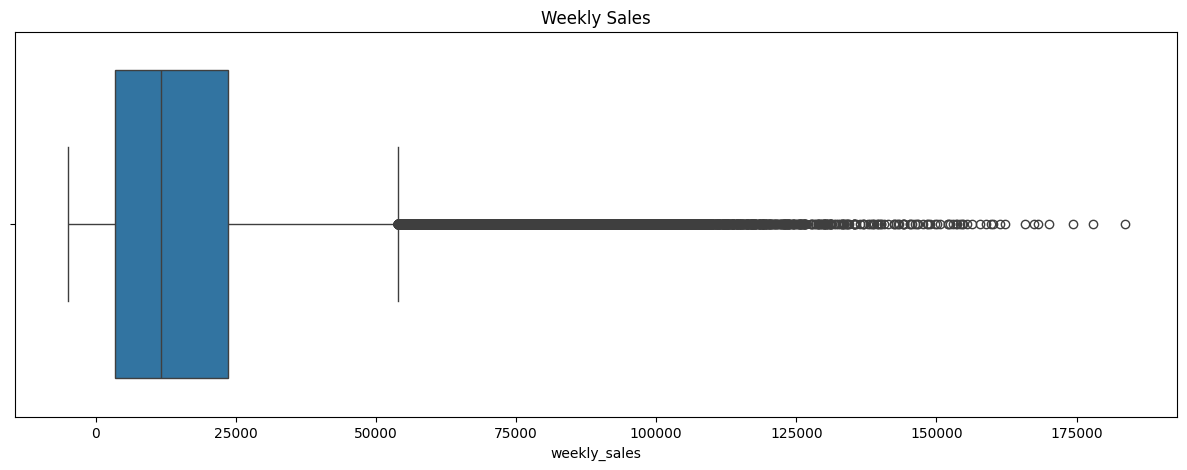

In [23]:
# Visualize outliers using boxplots (for numeric columns)
plt.figure(figsize=(15, 5))
sns.boxplot(x=sales['weekly_sales'])
plt.title('Weekly Sales')

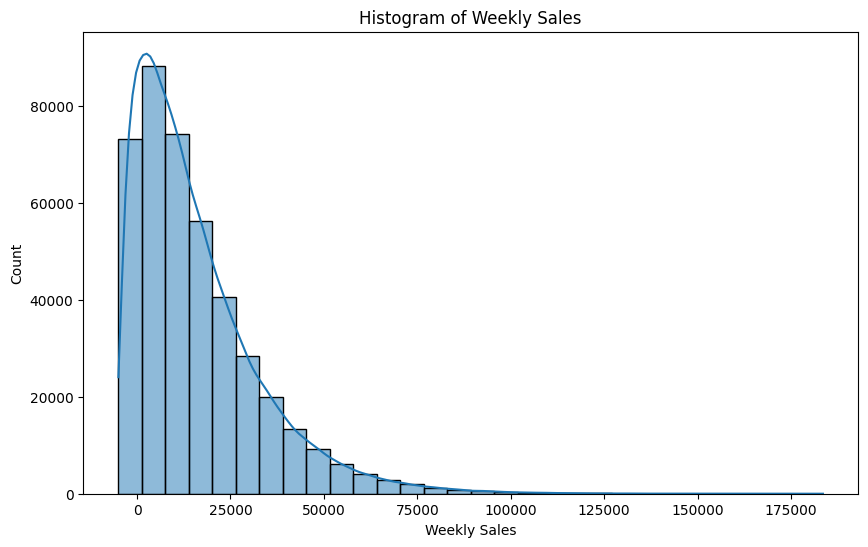

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(sales['weekly_sales'], bins=30, kde=True)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

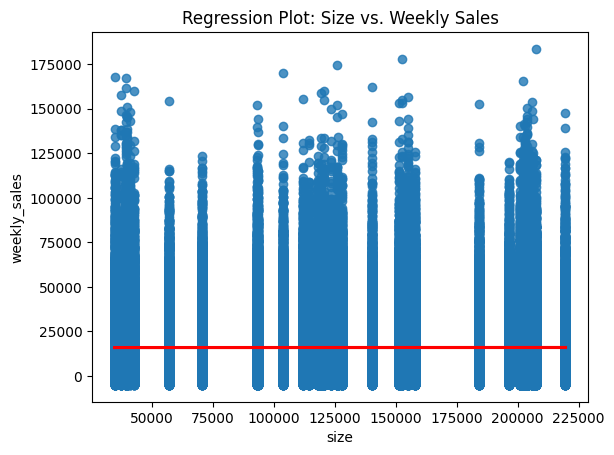

In [25]:
sns.regplot(x='size', y='weekly_sales', data=sales, line_kws={"color": "red"})
plt.title('Regression Plot: Size vs. Weekly Sales')
plt.show()

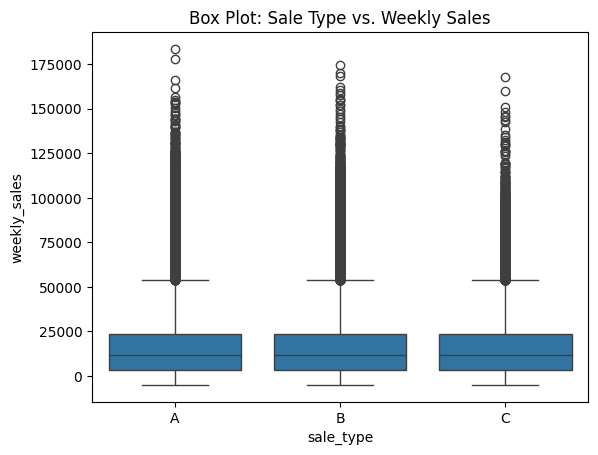

In [26]:
sns.boxplot(x='sale_type', y='weekly_sales', data=sales)
plt.title('Box Plot: Sale Type vs. Weekly Sales')
plt.show()

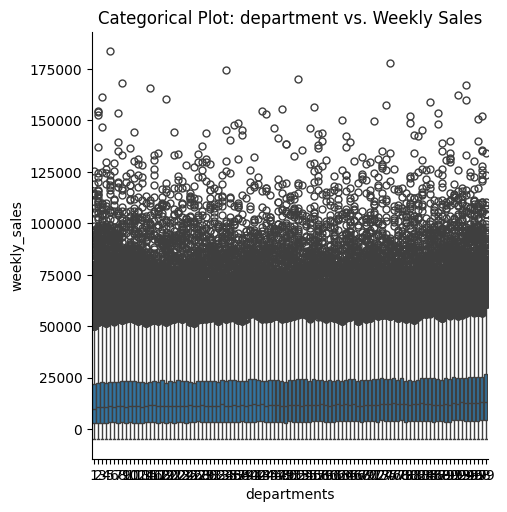

In [27]:
sns.catplot(x='departments', y='weekly_sales', kind='box', data=sales)
plt.title('Categorical Plot: department vs. Weekly Sales')
plt.show()

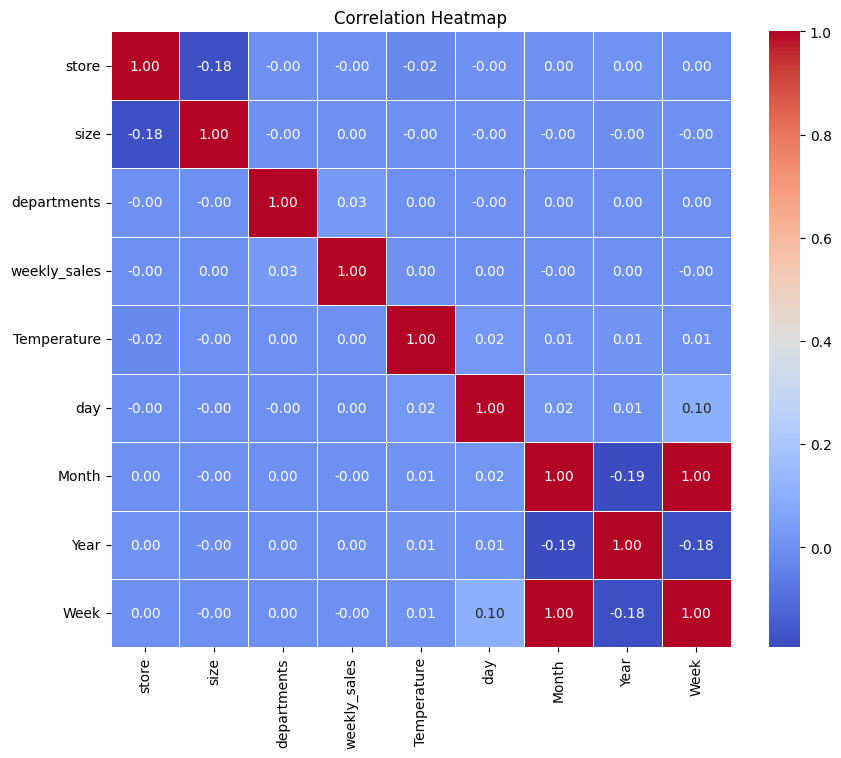

In [28]:
#Calculate the correlation matrix
numeric_columns = sales.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Encoding

In [29]:
print('Sales dataset dtype:',sales.dtypes)

Sales dataset dtype: store             int64
sale_type        object
size              int64
departments       int64
weekly_sales    float64
Temperature     float64
day               int64
Month             int64
Year              int64
Week              int64
dtype: object


In [30]:
# Encoding categorical column
sales_encoded = pd.get_dummies(sales, columns=['sale_type'], prefix='Type')

In [31]:
print('Sales dataset shape:',sales_encoded.shape)

Sales dataset shape: (421570, 12)


# Split dataset into test, val and training set and Train data on various regression models

In [32]:
# Extract features and target variable
X =sales_encoded.drop(['weekly_sales'], axis=1)
y =sales_encoded['weekly_sales']

# Split the data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

#Split the data into Validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Initialize lists to store results
results = []

# Iterate over models
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict on training and validation data
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate MAE and RMSE for training and validation data
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
    r2_train=r2_score (y_train, y_train_pred)
    r2_val=r2_score (y_val, y_val_pred)

    # Append results to list
    results.append({
        "Model": name,
        "MAE (Train)": mae_train,
        "RMSE (Train)": rmse_train,
        "MAE (Validation)": mae_val,
        "RMSE (Validation)": rmse_val,

    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display results
results_df


,Model,MAE (Train),RMSE (Train),MAE (Validation),RMSE (Validation)
0,Linear Regression,12920.649342,17142.432163,12859.401356,17002.917903
1,Decision Tree,3264.069601,7435.191097,17825.290129,24214.891212
2,Random Forest,6674.622238,9362.656816,14351.371785,19037.458739
3,Gradient Boosting,12906.755339,17124.610518,12860.876993,17005.789365


Based on the provided results, the Decision Tree model appears to have the lowest MAE and RMSE values on the training set. However, it has a higher MAE and RMSE on the validation set compared to the other models, indicating potential overfitting.

The Random Forest model has lower MAE and RMSE values on the validation set compared to the Decision Tree model, suggesting better generalization performance. Therefore, the Random Forest model may be the best candidate for further hyperparameter tuning and consideration.

The Linear Regression model has higher MAE and RMSE values compared to the Decision Tree and Random Forest models on both the training and validation sets. This indicates that it may not capture the non-linear relationships present in the data as effectively as the tree-based models.

The Gradient Boosting model has slightly lower MAE and RMSE values on the training set compared to the Decision Tree and Random Forest models. However, its performance on the validation set is similar to that of the Linear Regression model, with higher MAE and RMSE values. This suggests that while the Gradient Boosting model performs well on the training data, it may also suffer from overfitting on the validation data.

Overall, the Random Forest model seems to strike a better balance between performance on the training and validation sets, making it a more promising candidate for further consideration and hyperparameter tuning.








# Random Forest Hyperparameter tuning

### Dealing with outliers with Random Forest Model to improve training score


####  Truncate Outliers


In [34]:
sales_2=sales_encoded.copy()

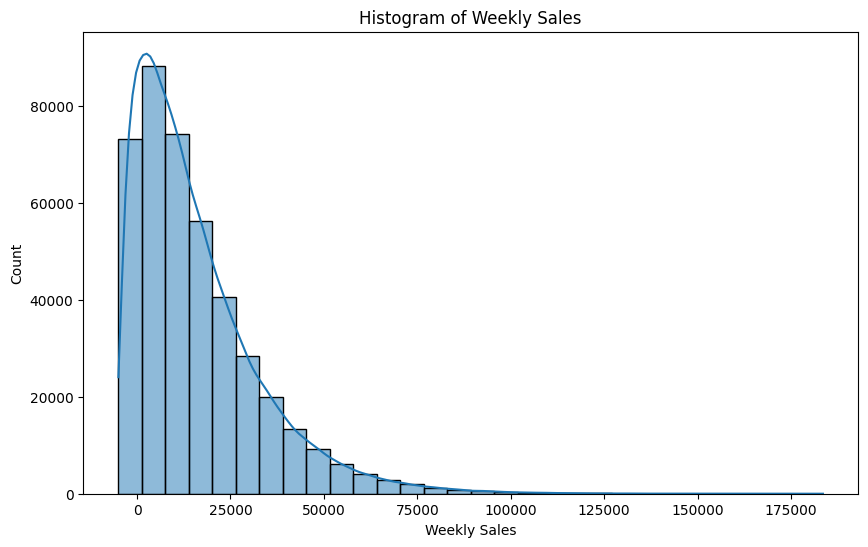

In [35]:
# Creating Outliers graph
plt.figure(figsize=(10, 6))
sns.histplot(sales['weekly_sales'], bins=30, kde=True)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

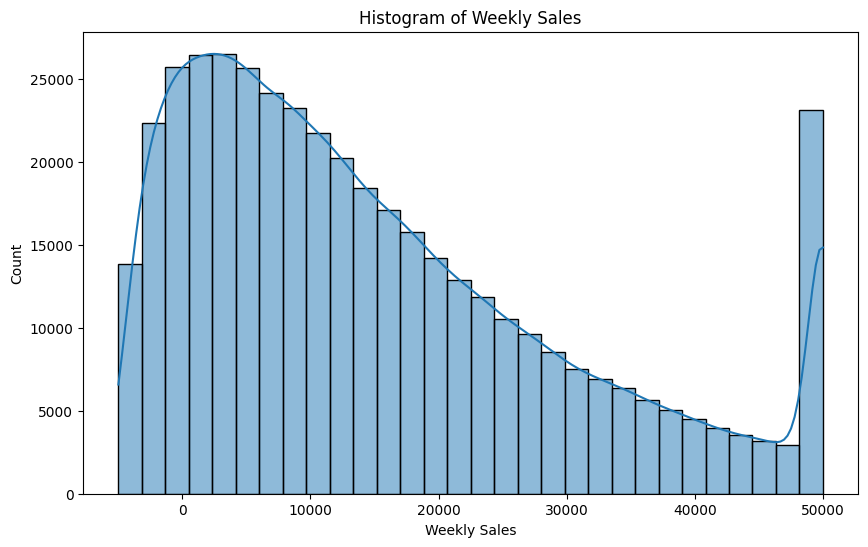

In [36]:
# Set a threshold for 'weekly_sales'
threshold = 50000
sales_2['truncated_sales'] = sales_2['weekly_sales'].apply(lambda x: threshold if x > threshold else x)

# Plot histogram for truncated data
plt.figure(figsize=(10, 6))
sns.histplot(sales_2['truncated_sales'], bins=30, kde=True)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

In [37]:
sales_2.dtypes

store                int64
size                 int64
departments          int64
weekly_sales       float64
Temperature        float64
day                  int64
Month                int64
Year                 int64
Week                 int64
Type_A               uint8
Type_B               uint8
Type_C               uint8
truncated_sales    float64
dtype: object

In [38]:
#Delete previous weekly_sales
sales_2=sales_2.drop(['weekly_sales'],axis=1)
# Rename Truncated weekly sale to weekly_sale
sales_2=sales_2.rename(columns={'truncated_sales': 'weekly_sales'})

In [39]:
# Extract features and target variable
X =sales_2.drop(['weekly_sales'], axis=1)
y =sales_2['weekly_sales']

# Split the data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

#Split the data into Validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)


MAE (Validation): 13221.352202492517
RMSE (Validation): 16549.83212671364
R2 (Validation): -0.267170105302041


#### Removing Outliers

In [40]:
sales_3=sales_encoded.copy()

In [41]:
# Remove outliers in 'weekly_sales' based on a z-score threshold
z_threshold = 2
sales_3 = sales_3[(sales_3['weekly_sales'] - sales_3['weekly_sales'].mean()).abs() < z_threshold * sales_3['weekly_sales'].std()]

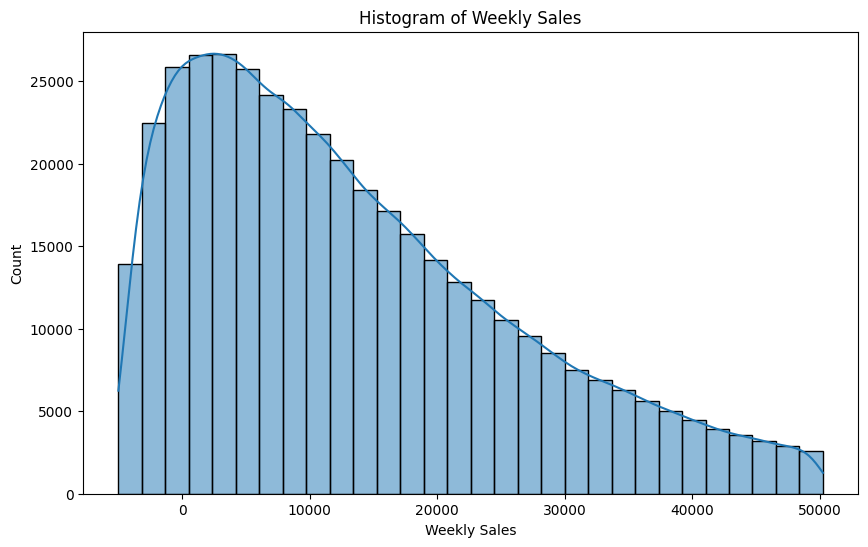

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_3['weekly_sales'], bins=30, kde=True)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

In [43]:
#Check new datasets sahpe and data type
print('Datatype of new dataset:',sales_3.dtypes)
print('Shape of new dataset:',sales_3.shape)

Datatype of new dataset: store             int64
size              int64
departments       int64
weekly_sales    float64
Temperature     float64
day               int64
Month             int64
Year              int64
Week              int64
Type_A            uint8
Type_B            uint8
Type_C            uint8
dtype: object
Shape of new dataset: (401351, 12)


In [44]:
# Extract features and target variable
X =sales_3.drop(['weekly_sales'], axis=1)
y =sales_3['weekly_sales']

# Split the data into training and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

#Split the data into Validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [45]:

# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)


# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)


MAE (Validation): 11644.843468453637
RMSE (Validation): 14459.267688045993
R2 (Validation): -0.24868302612057192



Removing outliers improves the performance on the validation set. Therefore, moving forward with the sales_3 dataset, where outliers have been removed, to make the graph less skewed to the left.

### Hyper parametertuning


 Utilizing manual hyperparameter tuning due to limited computational resources.

In [46]:
#Reviewing Model Parameter
random_forest_model=RandomForestRegressor()
model_parameters = {param: getattr(random_forest_model, param) for param in random_forest_model.get_params()}
model_parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


I am increasing the number of estimators and decreasing the maximum depth to determine if the model score improves. I have experimented with various combinations to select these parameters.

In [47]:
# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor(n_estimators=150,
                                  max_depth=20,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  criterion='squared_error'
          )

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)


# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)


MAE (Validation): 10733.81153731177
RMSE (Validation): 13127.626803592744
R2 (Validation): -0.02927649729255366


In [48]:
# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor(n_estimators=200,
                                  max_depth=2,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  criterion='friedman_mse'
          )

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)


# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)


MAE (Validation): 10589.96019698181
RMSE (Validation): 12936.514336239909
R2 (Validation): 0.0004738507222713517


In [49]:
# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor(n_estimators=150,
                                  max_depth=2,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  criterion='friedman_mse'
          )

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)


MAE (Validation): 10590.083011726161
RMSE (Validation): 12936.861002337551
R2 (Validation): 0.00042028042298591917


In [50]:
# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor(n_estimators=150,
                                  max_depth=4,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  criterion='friedman_mse'
          )

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)


# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)


MAE (Validation): 10588.467887343682
RMSE (Validation): 12935.462169706518
R2 (Validation): 0.0006364331874531004


We are procedding with n_estimators=150, max_depth=4, min_samples_split=10, min_samples_leaf=1, max_features='sqrt',bootstrap=True,criterion='friedman_mse'

# Predict Sales and Generate Insights

In [51]:
# Apply the chosen model to the test dataset to predict retail sales
y_pred_test = rf_model.predict(X_test)

# Evaluate the predictions using evaluation metrics
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test=r2_score(y_test, y_pred_test)
print("mae_test:",mae_test)
print('rmse_test:',rmse_test)

mae_test: 10518.817601288129
rmse_test: 12867.709008806185


In [52]:
import pandas as pd

y_pred_test = pd.DataFrame({'Predicted_Target': y_pred_test})

# Reset the index of X_test and y_test to ensure proper alignment
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Concatenate X_test, y_test, and y_pred_df along the columns axis
merged_df = pd.concat([X_test, y_test, y_pred_test], axis=1)

# Print the merged DataFrame
print(merged_df)


       store    size  departments  Temperature  day  Month  Year  Week  \
0         40  155083           19        62.39    8      4  2011    14   
1         10  126512           70        37.61   24      8  2012    34   
2         29   93638            5        95.75   17      8  2012    33   
3         37   39910           39        42.95   31      8  2012    35   
4          4  205863            6        16.96   19      8  2011    33   
...      ...     ...          ...          ...  ...    ...   ...   ...   
40131     21  140167           71        62.05    6      1  2012     1   
40132     24  203819           98        50.33   15      7  2011    28   
40133     40  155083            6        34.59   25      5  2012    21   
40134     27  204184           52        84.27    4      2  2011     5   
40135      9  125833           27        41.22   16     12  2011    50   

       Type_A  Type_B  Type_C  weekly_sales  Predicted_Target  
0           1       0       0  -3419.634408    

In [53]:
merged_df.dtypes

store                 int64
size                  int64
departments           int64
Temperature         float64
day                   int64
Month                 int64
Year                  int64
Week                  int64
Type_A                uint8
Type_B                uint8
Type_C                uint8
weekly_sales        float64
Predicted_Target    float64
dtype: object

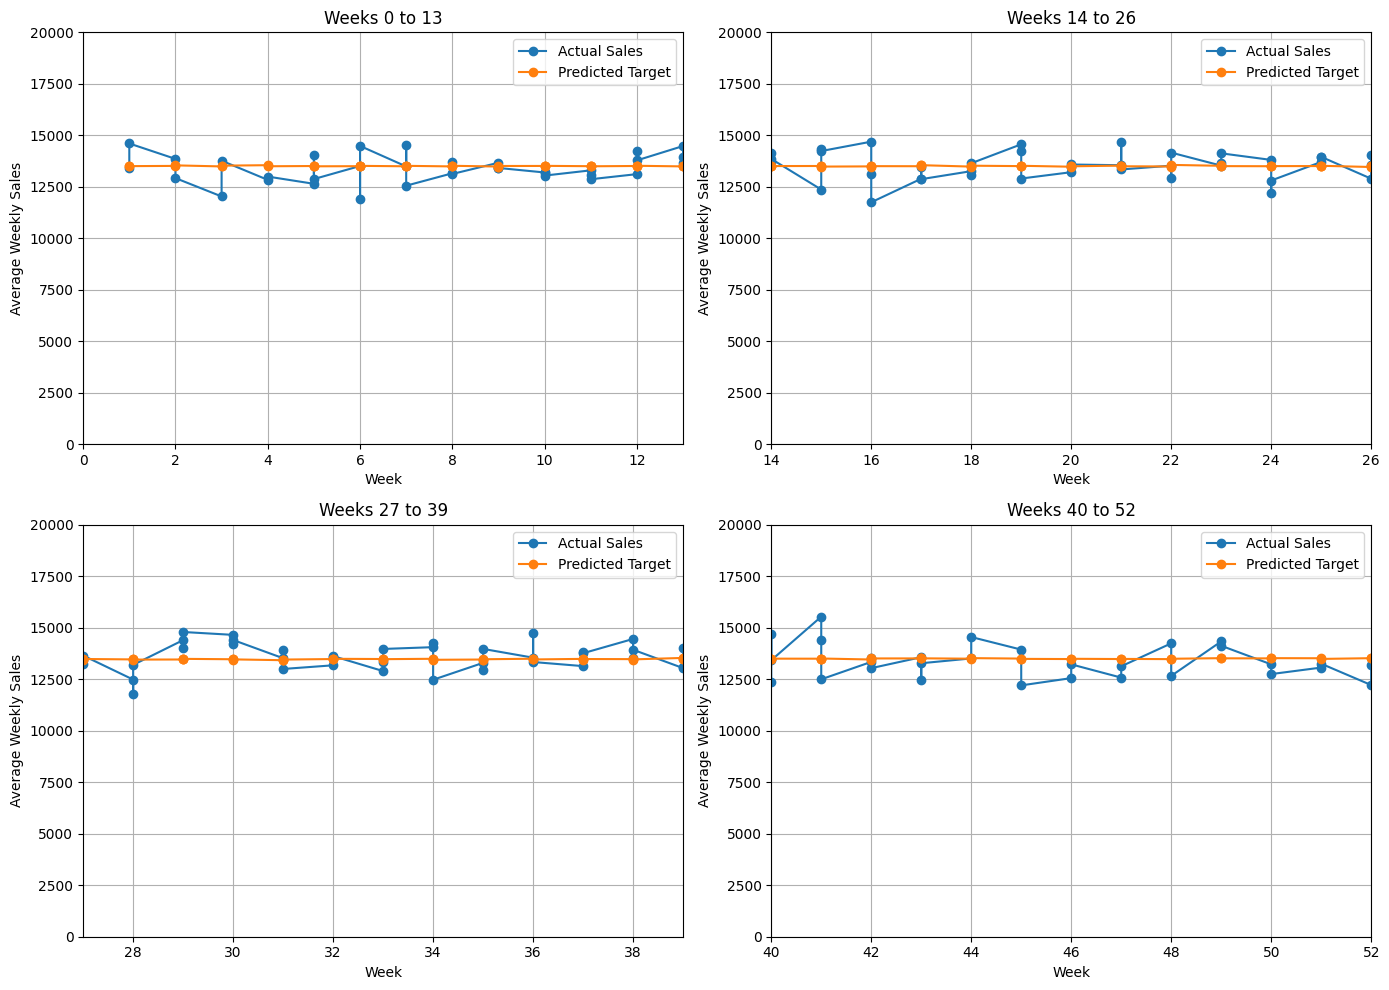

In [54]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Group by 'Week' and 'Year' and calculate the average weekly sales and predicted target
average_weekly_sales = merged_df.groupby(['Week', 'Year'])['weekly_sales'].mean().reset_index()
average_weekly_predicted = merged_df.groupby(['Week', 'Year'])['Predicted_Target'].mean().reset_index()

# Define the ranges for the subplots
ranges = [(0, 13), (14, 26), (27, 39), (40, 52)]

for i, ax in enumerate(axs.flatten()):
    # Get the range for the current subplot
    xlim_range = ranges[i]

    # Filter the data within the range
    sales_range = average_weekly_sales[(average_weekly_sales['Week'] >= xlim_range[0]) & (average_weekly_sales['Week'] <= xlim_range[1])]
    predicted_range = average_weekly_predicted[(average_weekly_predicted['Week'] >= xlim_range[0]) & (average_weekly_predicted['Week'] <= xlim_range[1])]

    # Plot the data for the current subplot
    ax.plot(sales_range['Week'], sales_range['weekly_sales'], marker='o', linestyle='-', label='Actual Sales')
    ax.plot(predicted_range['Week'], predicted_range['Predicted_Target'], marker='o', linestyle='-', label='Predicted Target')
    ax.set_title(f'Weeks {xlim_range[0]} to {xlim_range[1]}')
    ax.set_xlabel('Week')
    ax.set_ylabel('Average Weekly Sales')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(xlim_range)
    ax.set_ylim(0, 20000)  # Set custom y-axis limits

plt.tight_layout()
plt.show()

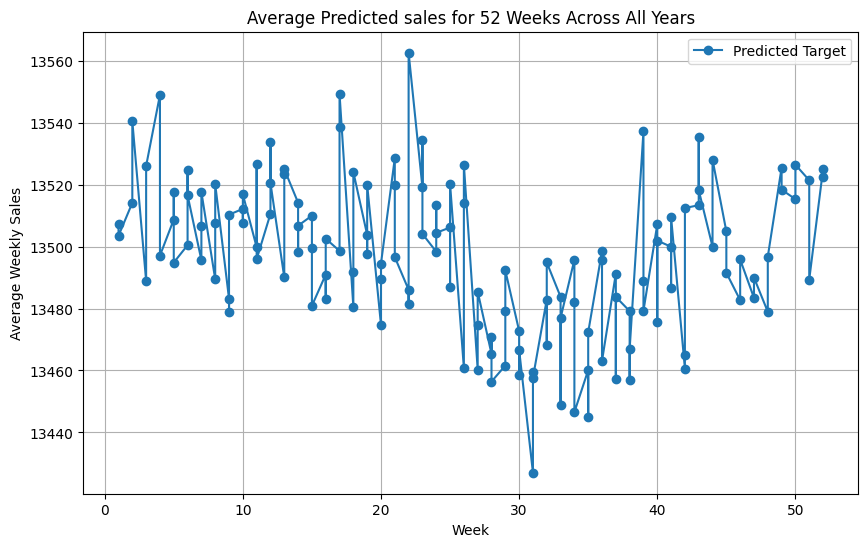

In [55]:
from matplotlib.pyplot import ylim,xlim
# Group by 'Week' and 'Year' and calculate the average weekly predicted sales
average_weekly_predicted = merged_df.groupby(['Week', 'Year'])['Predicted_Target'].mean().reset_index()

# Plot the average weekly sales and predicted target
plt.figure(figsize=(10, 6))
plt.plot(average_weekly_predicted['Week'], average_weekly_predicted['Predicted_Target'], marker='o', linestyle='-', label='Predicted Target')
plt.title('Average Predicted sales for 52 Weeks Across All Years')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-56-b29be3425b56>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df, x='Week', y='Predicted_Target', hue='Year', ci=None)


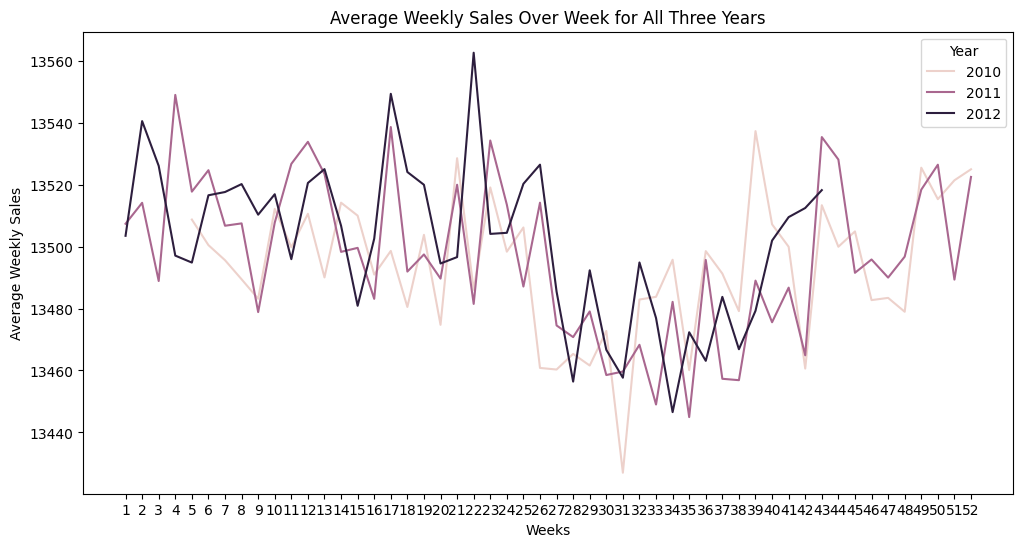

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Week', y='Predicted_Target', hue='Year', ci=None)
#sns.lineplot(data=average_weekly_sales,x='Week', y='weekly_sales',ci=None)
plt.title('Average Weekly Sales Over Week for All Three Years')
plt.xlabel('Weeks')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 53))
plt.legend(title='Year')
plt.show()

<ipython-input-57-68b8ba52150e>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df, x='Month', y='Predicted_Target', hue='Year', ci=None, ax=axes[0])
<ipython-input-57-68b8ba52150e>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df, x='Month', y='weekly_sales', hue='Year', ci=None, ax=axes[1])


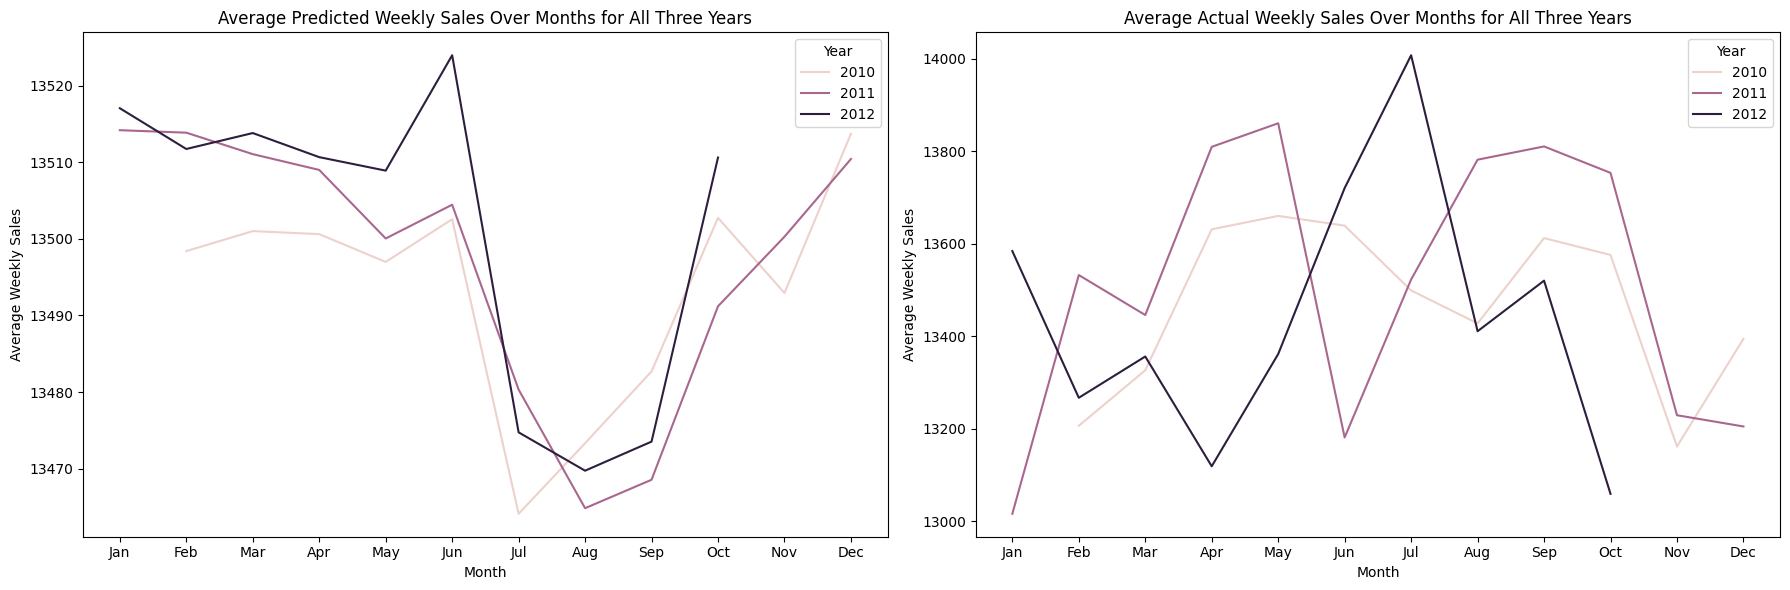

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Average Predicted Weekly Sales Over Months
sns.lineplot(data=merged_df, x='Month', y='Predicted_Target', hue='Year', ci=None, ax=axes[0])
axes[0].set_title('Average Predicted Weekly Sales Over Months for All Three Years')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Weekly Sales')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].legend(title='Year')

# Plot Average Actual Weekly Sales Over Months
sns.lineplot(data=merged_df, x='Month', y='weekly_sales', hue='Year', ci=None, ax=axes[1])
axes[1].set_title('Average Actual Weekly Sales Over Months for All Three Years')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Weekly Sales')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].legend(title='Year')

plt.tight_layout()
plt.show()



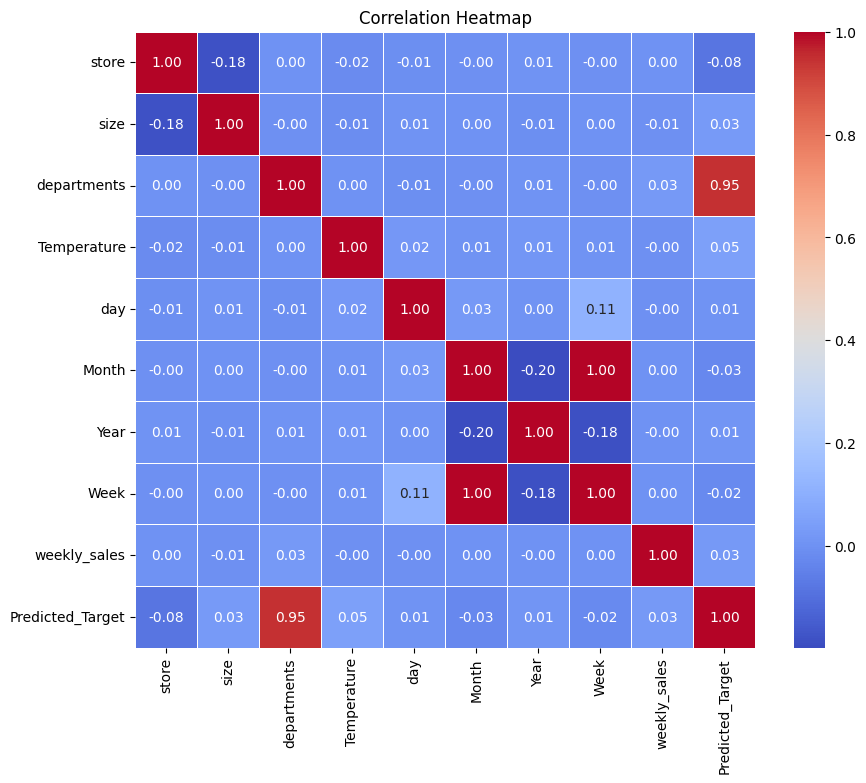

In [58]:
#Correlation matrix for new dataset
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

This tells sales type A has highest predicted sales

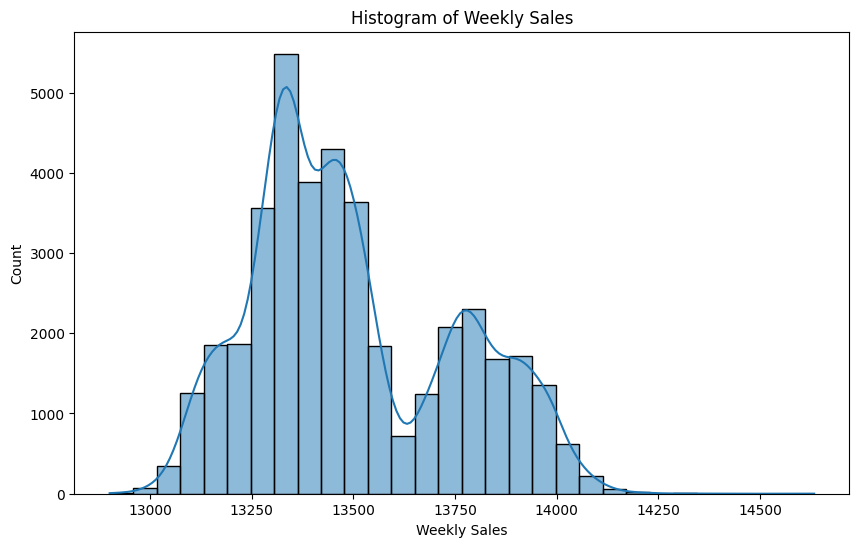

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Predicted_Target'], bins=30, kde=True)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

# Add New Features and Apply Feature Selection



To improve sales predictions, you can consider adding various features that may capture different aspects influencing sales. Here are some feature ideas you can explore:

Seasonality Features:

Quarter: Identify sales trends by quarter.
Season: Define seasons (e.g., winter, spring, summer, fall) and encode them as categorical variables.

Economic Features:

Consumer price index (CPI): Reflects changes in the cost of living and can impact purchasing power.
Unemployment rate: Higher unemployment rates may correlate with lower consumer spending.
GDP growth rate: Indicator of overall economic growth, which can influence consumer confidence and spending.


In [60]:
sales_4=sales_3.copy()
sales_4.dtypes

store             int64
size              int64
departments       int64
weekly_sales    float64
Temperature     float64
day               int64
Month             int64
Year              int64
Week              int64
Type_A            uint8
Type_B            uint8
Type_C            uint8
dtype: object

In [61]:
# Define function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

# Extract season information
sales_4['season'] = sales_4['Month'].apply(get_season)

# Convert season to categorical variable
sales_4['season'] = pd.Categorical(sales_4['season'], categories=['winter', 'spring', 'summer', 'fall'])

# Display the DataFrame with new columns
sales_4

,store,size,departments,weekly_sales,Temperature,day,Month,Year,Week,Type_A,Type_B,Type_C,season
0,1,151315,12,39334.454177,64.51,5,2,2010,5,1,0,0,winter
2,1,151315,77,-1622.215803,64.51,5,2,2010,5,1,0,0,winter
3,1,151315,56,47337.747167,64.51,5,2,2010,5,1,0,0,winter
4,1,151315,98,4549.121928,64.51,5,2,2010,5,1,0,0,winter
5,1,151315,5,39184.328754,64.51,5,2,2010,5,1,0,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,118221,72,1028.693318,39.97,26,10,2012,43,0,1,0,fall
421566,45,118221,3,2879.689895,39.97,26,10,2012,43,0,1,0,fall
421567,45,118221,41,21113.423728,39.97,26,10,2012,43,0,1,0,fall
421568,45,118221,2,9409.039719,39.97,26,10,2012,43,0,1,0,fall


In [62]:
import pandas_datareader.data as web

# Define the start and end dates for the data
start_date = '2010-01-01'
end_date = '2013-12-31'  # Or any desired end date

# Fetch CPI data from FRED (Federal Reserve Economic Data)
cpi_data = web.DataReader('CPIAUCNS', 'fred', start=start_date, end=end_date)
cpi_data.reset_index(inplace=True)
cpi_data['Month'] = cpi_data['DATE'].dt.month
cpi_data['Year'] = cpi_data['DATE'].dt.year


# Fetch Unemployment Rate data from FRED
unemployment_data = web.DataReader('UNRATE', 'fred', start=start_date, end=end_date)
unemployment_data.reset_index(inplace=True)
unemployment_data['Month'] = unemployment_data['DATE'].dt.month
unemployment_data['Year'] = unemployment_data['DATE'].dt.year

# Print the first few rows of each dataset
print("Consumer Price Index (CPI) Data:")
print(cpi_data.head())

print("\nUnemployment Rate Data:")
print(unemployment_data.head())

# Fetch GDP data from FRED (Federal Reserve Economic Data)
gdp_data = web.DataReader('GDP', 'fred', start=start_date, end=end_date)
gdp_data.reset_index(inplace=True)
gdp_data['Month'] = gdp_data['DATE'].dt.month
gdp_data['Year'] = gdp_data['DATE'].dt.year
gdp_data=gdp_data.rename(columns={'DATE':'date'})

# Print the first few rows of the GDP dataset
print("GDP Data:")
print(gdp_data.head())


Consumer Price Index (CPI) Data:
        DATE  CPIAUCNS  Month  Year
0 2010-01-01   216.687      1  2010
1 2010-02-01   216.741      2  2010
2 2010-03-01   217.631      3  2010
3 2010-04-01   218.009      4  2010
4 2010-05-01   218.178      5  2010

Unemployment Rate Data:
        DATE  UNRATE  Month  Year
0 2010-01-01     9.8      1  2010
1 2010-02-01     9.8      2  2010
2 2010-03-01     9.9      3  2010
3 2010-04-01     9.9      4  2010
4 2010-05-01     9.6      5  2010
GDP Data:
        date        GDP  Month  Year
0 2010-01-01  14764.610      1  2010
1 2010-04-01  14980.193      4  2010
2 2010-07-01  15141.607      7  2010
3 2010-10-01  15309.474     10  2010
4 2011-01-01  15351.448      1  2011


In [63]:
print('CPI shape:',cpi_data.shape)
print('unemployment_data shape:',unemployment_data.shape)
print('gdp_data shape:',gdp_data.shape)

CPI shape: (48, 4)
unemployment_data shape: (48, 4)
gdp_data shape: (16, 4)


In [64]:
sales_4['date'] = pd.to_datetime(sales_4[['Year', 'Month', 'day']].astype(str).agg('-'.join, axis=1))
sales_4.dtypes

store                    int64
size                     int64
departments              int64
weekly_sales           float64
Temperature            float64
day                      int64
Month                    int64
Year                     int64
Week                     int64
Type_A                   uint8
Type_B                   uint8
Type_C                   uint8
season                category
date            datetime64[ns]
dtype: object

In [65]:
sales_4

,store,size,departments,weekly_sales,Temperature,day,Month,Year,Week,Type_A,Type_B,Type_C,season,date
0,1,151315,12,39334.454177,64.51,5,2,2010,5,1,0,0,winter,2010-02-05
2,1,151315,77,-1622.215803,64.51,5,2,2010,5,1,0,0,winter,2010-02-05
3,1,151315,56,47337.747167,64.51,5,2,2010,5,1,0,0,winter,2010-02-05
4,1,151315,98,4549.121928,64.51,5,2,2010,5,1,0,0,winter,2010-02-05
5,1,151315,5,39184.328754,64.51,5,2,2010,5,1,0,0,winter,2010-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,118221,72,1028.693318,39.97,26,10,2012,43,0,1,0,fall,2012-10-26
421566,45,118221,3,2879.689895,39.97,26,10,2012,43,0,1,0,fall,2012-10-26
421567,45,118221,41,21113.423728,39.97,26,10,2012,43,0,1,0,fall,2012-10-26
421568,45,118221,2,9409.039719,39.97,26,10,2012,43,0,1,0,fall,2012-10-26


In [66]:
# Merge CPI data with your dataset based on date
df = pd.merge(sales_4, cpi_data, on=['Year', 'Month'], how='left')
df.shape

(401351, 16)

In [67]:
# Merge Unemployment Rate data with your dataset based on date
df = pd.merge(df, unemployment_data, on=['Year', 'Month'], how='left')
df.shape

(401351, 18)

In [68]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'day']].astype(str).agg('-'.join, axis=1))
# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)
df = pd.merge_asof(df, gdp_data, left_on='date', right_on='date', direction='nearest')
df.shape

(401351, 21)

In [69]:
df.dtypes

store                    int64
size                     int64
departments              int64
weekly_sales           float64
Temperature            float64
day                      int64
Month_x                  int64
Year_x                   int64
Week                     int64
Type_A                   uint8
Type_B                   uint8
Type_C                   uint8
season                category
date            datetime64[ns]
DATE_x          datetime64[ns]
CPIAUCNS               float64
DATE_y          datetime64[ns]
UNRATE                 float64
GDP                    float64
Month_y                  int64
Year_y                   int64
dtype: object

In [70]:
df_2= df.drop(['DATE_x', 'DATE_y','Month_y'], axis=1)

In [71]:
df_2.shape

(401351, 18)

In [72]:
print("Missing Values:")
print(df_2.isnull().sum())

Missing Values:
store           0
size            0
departments     0
weekly_sales    0
Temperature     0
day             0
Month_x         0
Year_x          0
Week            0
Type_A          0
Type_B          0
Type_C          0
season          0
date            0
CPIAUCNS        0
UNRATE          0
GDP             0
Year_y          0
dtype: int64


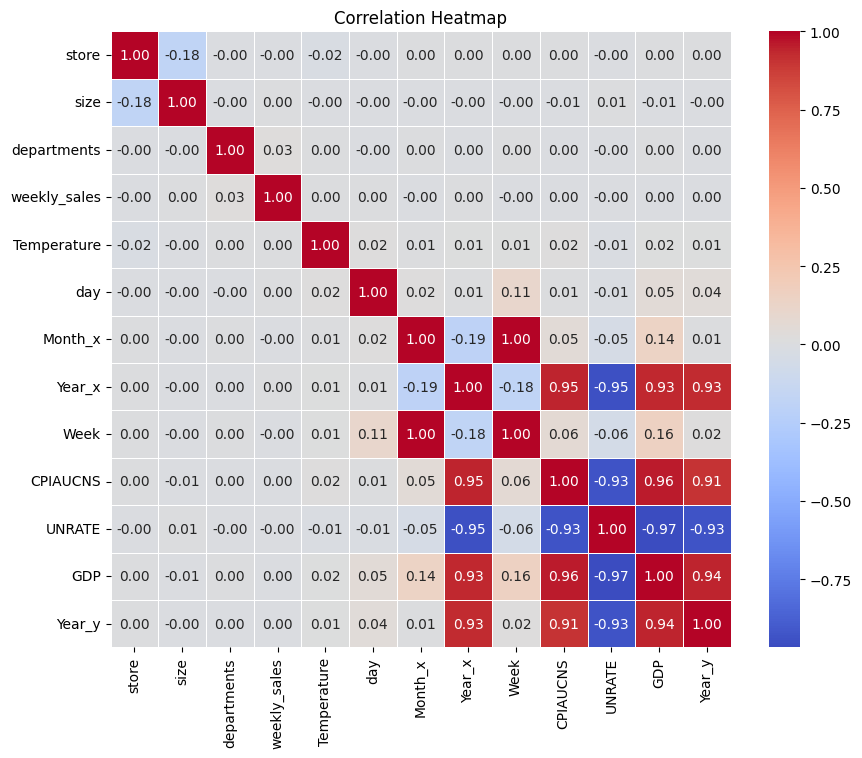

In [73]:
#Correlation matrix for new dataset
numeric_columns = df_2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

# Training New Dataset

In [74]:
df_2.dtypes

store                    int64
size                     int64
departments              int64
weekly_sales           float64
Temperature            float64
day                      int64
Month_x                  int64
Year_x                   int64
Week                     int64
Type_A                   uint8
Type_B                   uint8
Type_C                   uint8
season                category
date            datetime64[ns]
CPIAUCNS               float64
UNRATE                 float64
GDP                    float64
Year_y                   int64
dtype: object

In [75]:
df_2.shape

(401351, 18)

In [76]:
#Encoding
df_2_encoded = pd.get_dummies(df_2, columns=['season'], prefix='Type')

In [77]:
df_2_encoded=df_2_encoded.drop('date',axis=1)

In [78]:
df_2_encoded.dtypes

store             int64
size              int64
departments       int64
weekly_sales    float64
Temperature     float64
day               int64
Month_x           int64
Year_x            int64
Week              int64
Type_A            uint8
Type_B            uint8
Type_C            uint8
CPIAUCNS        float64
UNRATE          float64
GDP             float64
Year_y            int64
Type_winter       uint8
Type_spring       uint8
Type_summer       uint8
Type_fall         uint8
dtype: object

In [79]:
# Remove outliers in 'weekly_sales' based on a z-score threshold
z_threshold = 2
df_2_encoded = df_2_encoded[(df_2_encoded['weekly_sales'] - df_2_encoded['weekly_sales'].mean()).abs() < z_threshold * df_2_encoded['weekly_sales'].std()]

In [80]:
# Extract features and target variable
X =df_2_encoded.drop(['weekly_sales'], axis=1)
y =df_2_encoded['weekly_sales']


# Split the data into training and temp sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regression model with initial hyperparameters
rf_model = RandomForestRegressor(n_estimators=150,
                                  max_depth=4,
                                  min_samples_split=10,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  criterion='friedman_mse'
          )

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_test = rf_model.predict(X_test)

# Calculate MAE and RMSE on validation set
mae_val = mean_absolute_error(y_test, y_pred_test)
rmse_val = mean_squared_error(y_test, y_pred_test, squared=False)
R2= r2_score(y_test, y_pred_test)

# Print the metrics
print("MAE (Validation):", mae_val)
print("RMSE (Validation):", rmse_val)
print('R2:',R2)


MAE (Validation): 9188.222235385609
RMSE (Validation): 11036.806042460477
R2: 0.00026183982762117974
